In [87]:
# Data source: John Hopkins
# link to data: https://github.com/CSSEGISandData/COVID-19
# import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager
import matplotlib.ticker as ticker
import matplotlib.dates as mdates
import matplotlib as mpl
import math

# setting image dpi
%matplotlib inline
mpl.rcParams['figure.dpi'] = 300

# font parameters
font_name = 'Times New Roman'
font_size = 16
axis_font = {'fontfamily': font_name,'fontsize': font_size, 'fontweight': 'normal'}


In [88]:
# loading data from website
''' # These link no longer work
# no of cases confirmed
df_confirmed = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv")
# no of deaths
df_deaths = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv")
# no of recovered cases
df_recovered = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv")
'''
# no of cases confirmed
df_confirmed = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv")
df_confirmed.to_csv('confirmed.csv')
# no of deaths
df_deaths = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv")
df_deaths.to_csv('deaths.csv')
# no of recovered cases
df_recovered = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv")
df_recovered.to_csv('recovered.csv')

In [89]:
col_names = list(df_confirmed.columns) 
# the first four columns are 'Province/State', 'Country/Region', 'Lat', 'Long'. Dates start from fifth column
# making a list of dates
dates= col_names[4:]
print('Start date: {}'.format(dates[0])) # data collection starting date
print('End date: {}'.format(dates[-1])) # latest date

Start date: 1/22/20
End date: 4/3/20


In [90]:
# unique coutries 
countries = list(df_confirmed['Country/Region'].unique())
print('No of countries with confirmed cases: {}'.format(len(countries))) # no of countries with confirmed cases
#print(countries)

No of countries with confirmed cases: 181


In [91]:
df = pd.DataFrame(data = None) # dummy dataframe

# dataframe with latest information on confirmed, deaths, and recovered cases
df_latest = pd.DataFrame(columns = ['country','confirmed', 'deaths', 'recovered'])

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# appending data for each country in a df_latest dataframe. Many countries have multiple rows becauses of data from different states/provinces.
# hence grouping and summing by countires
for i in countries:
    #print(i)
    #print(len(df_confirmed.groupby('Country/Region').get_group(i)))
    #print((df_confirmed.groupby('Country/Region').get_group(i)))
    #print(len(list(df_confirmed.groupby('Country/Region').get_group(i).sum()[4:])))
    #print(list(df_confirmed.groupby('Country/Region').get_group(i).sum()[4:])[-1])
    #print(list(df_confirmed.groupby('Country/Region').get_group(i).sum()[4:]))
    #print(df_confirmed.groupby('Country/Region').get_group(i).sum()[4:])
    df[i] = (df_confirmed.groupby('Country/Region').get_group(i).sum()[4:])
    #df[i] = list(df_confirmed.groupby('Country/Region').get_group(i).sum()[4:])
    #print(len(df))
    confirmed = df[i].iloc[-1]
    #df[i] = list(df_deaths.groupby('Country/Region').get_group(i).sum()[4:])
    df[i] = (df_deaths.groupby('Country/Region').get_group(i).sum()[4:])
    deaths = df[i].iloc[-1]
    #df[i] = list(df_recovered.groupby('Country/Region').get_group(i).sum()[4:])
    df[i] = (df_recovered.groupby('Country/Region').get_group(i).sum()[4:])

    recovered = df[i].iloc[-1]
    df_latest = df_latest.append({'country' : i , 'confirmed' : confirmed, 'deaths' : deaths, 'recovered' : recovered} , ignore_index=True)

In [92]:
#print(df_latest.head())
# sorting the df_latest dataframe by number of confirmed cases in descending order 
df_latest.sort_values(by = 'confirmed', axis=0, ascending=False, inplace=True)
print(df_latest.head(10))

            country confirmed deaths recovered
156              US    275586   7087      9707
77            Italy    119827  14681     19758
138           Spain    119199  11198     30513
60          Germany     91159   1275     24575
32            China     82511   3326     76760
56           France     65202   6520     14135
73             Iran     53183   3294     17935
154  United Kingdom     38689   3611       208
150          Turkey     20921    425       484
143     Switzerland     19606    591      4846


In [93]:
# defining a function to format some properties of figures
def axis_formatter(ax):
    from matplotlib import font_manager
    fontname = font_name
    tick_fontsize = font_size
    legend_fontsize = 14
    
    ticks_font = font_manager.FontProperties(family=fontname, size=tick_fontsize, weight='normal')
    for tick in ax.get_xticklabels():
        tick.set_fontproperties(ticks_font)
    for tick in ax.get_yticklabels():
        tick.set_fontproperties(ticks_font)
    #ax.grid(axis = 'x',alpha = 0.2, zorder=0)
    #ax.legend(prop={'family':font_name, 'size':legend_fontsize})


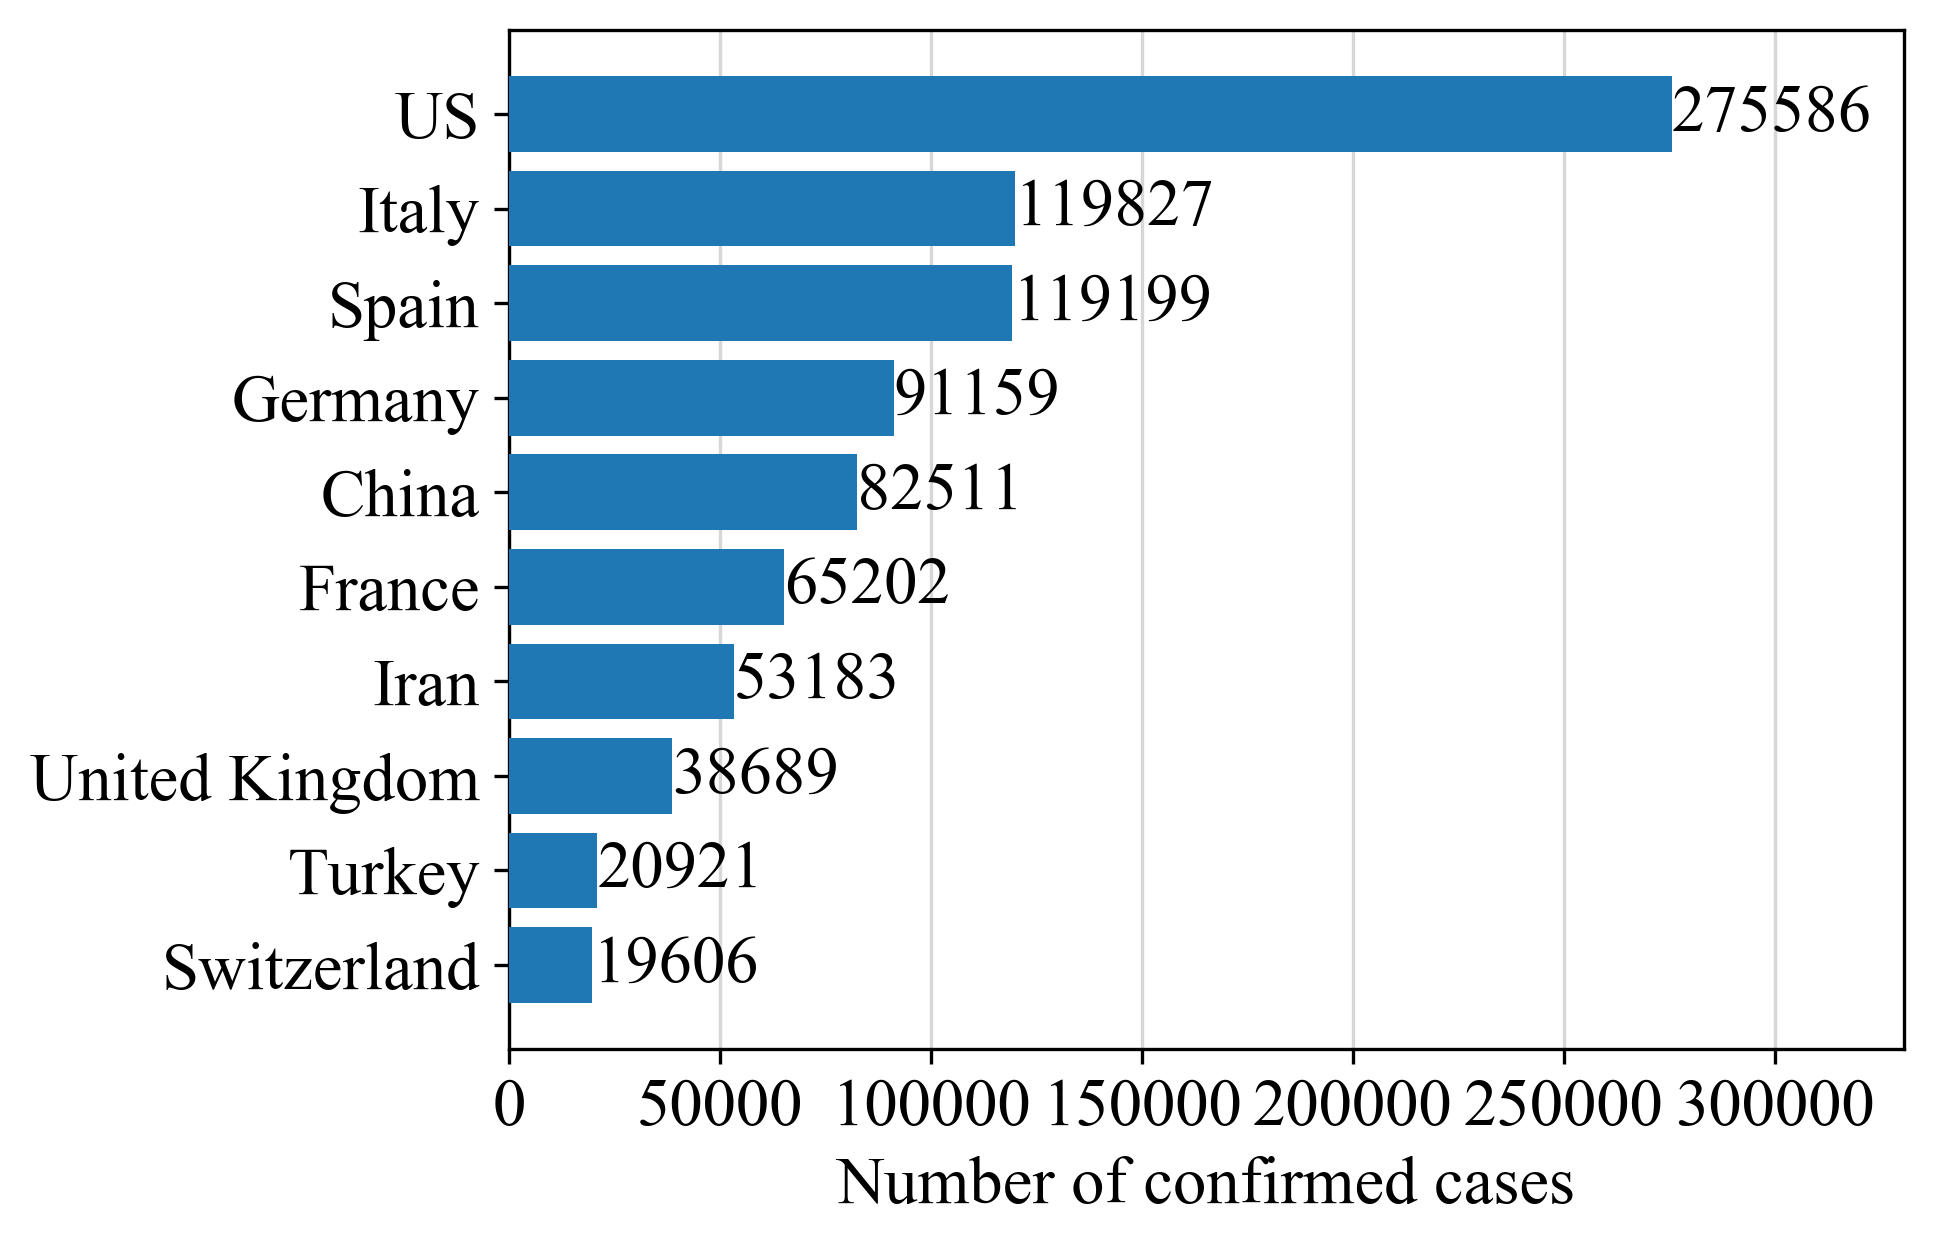

In [102]:
# top 10 countries with confirmed cases
fig1 = plt.figure(figsize = (6, 4.5)) # w x h in inches
ax1 = fig1.add_subplot(111)

number = 10 # top x countries
x = df_latest.sort_values(by = 'confirmed', axis=0, ascending=False)['confirmed'][0:number] # no of cases
c = df_latest.sort_values(by = 'confirmed', axis=0, ascending=False)['country'][0:number] # countries with cases
y = np.arange(0, number,1) 

ax1.barh(y, x, align='center',zorder=3) # plotting bar chart

ax1.set_yticks(y)
ax1.set_yticklabels(c)
ax1.set_xlim(0, max(x)*1.2)
ax1.invert_yaxis()  # labels read top-to-bottom
ax1.set_xlabel('Number of confirmed cases', fontdict=axis_font)
#ax1.set_title('Number of confirmed cases', fontdict=axis_font)


for i, (x, y) in enumerate(zip(x, y)):
    ax1.text(x, i, x, ha='left', va = 'center', fontfamily = font_name, fontsize = font_size)

ax1.grid(axis = 'x',alpha = 0.5, zorder=0) # adding grid in the back with high transparency
axis_formatter(ax = ax1)

fig1.savefig('top_10_confirmed.png', dpi = 600, bbox_inches = "tight")


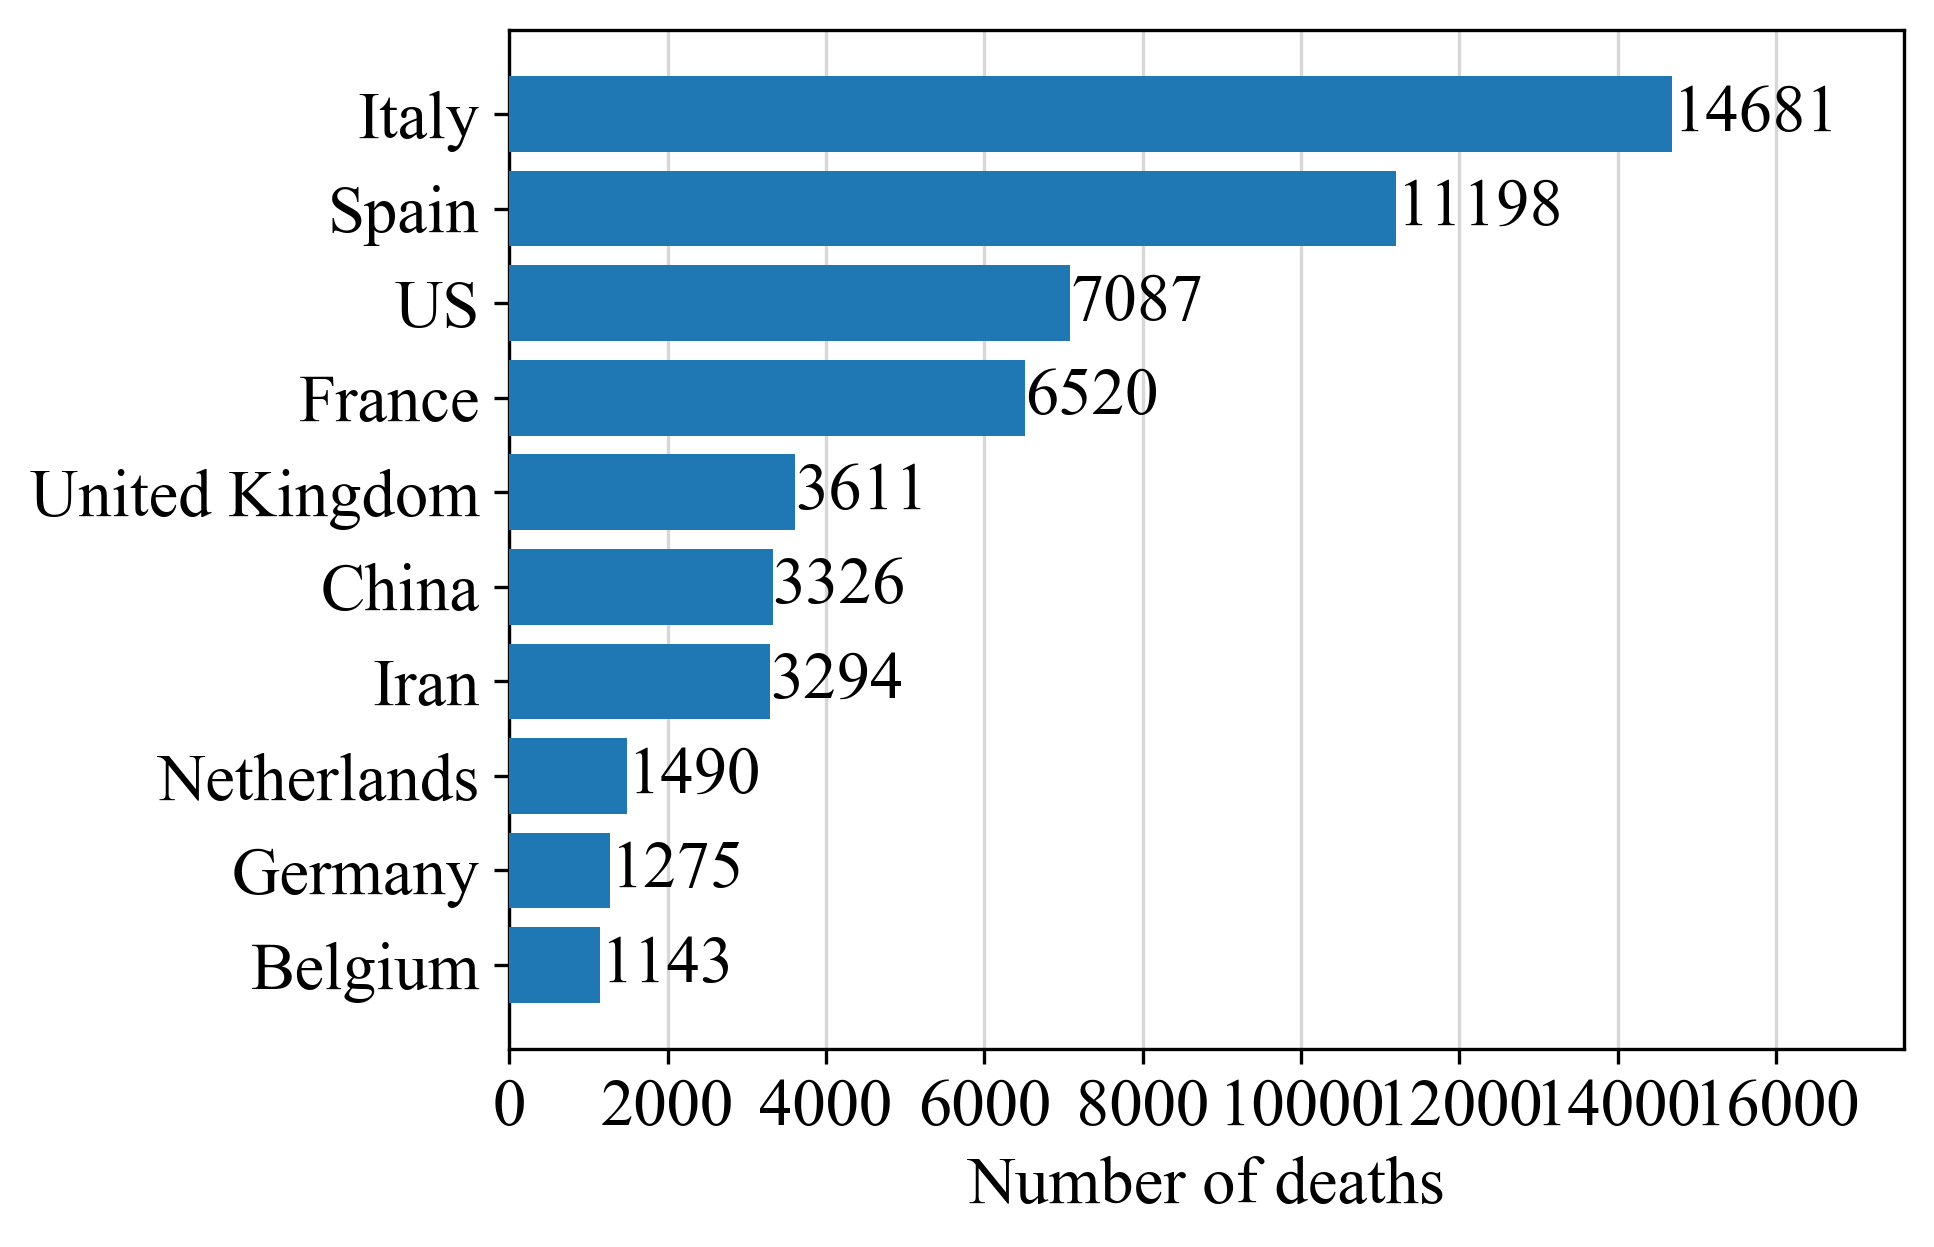

In [103]:
# top 10 countries with deaths
fig2 = plt.figure(figsize = (6, 4.5)) # w x h in inches
ax2 = fig2.add_subplot(111)

number = 10 # top x countries

x = df_latest.sort_values(by = 'deaths', axis=0, ascending=False)['deaths'][0:number]
c = df_latest.sort_values(by = 'deaths', axis=0, ascending=False)['country'][0:number]
y = np.arange(0, 10,1)

ax2.barh(y, x, align='center',zorder=3)

ax2.set_yticks(np.arange(0, 10,1))
ax2.set_yticklabels(c)
ax2.set_xlim(0, max(x)*1.2)
ax2.invert_yaxis()  # labels read top-to-bottom
ax2.set_xlabel('Number of deaths', fontdict=axis_font)
#ax2.set_title('Number of deaths', fontdict=axis_font)

for i, (x, y) in enumerate(zip(x, y)):
    ax2.text(x, i, x,ha='left', va = 'center', fontfamily = font_name, fontsize = font_size)  
    
ax2.grid(axis = 'x',alpha = 0.5, zorder=0) # adding grid in the back with high transparency
axis_formatter(ax = ax2)

fig2.savefig('top_10_deaths.png', dpi = 600, bbox_inches = "tight")

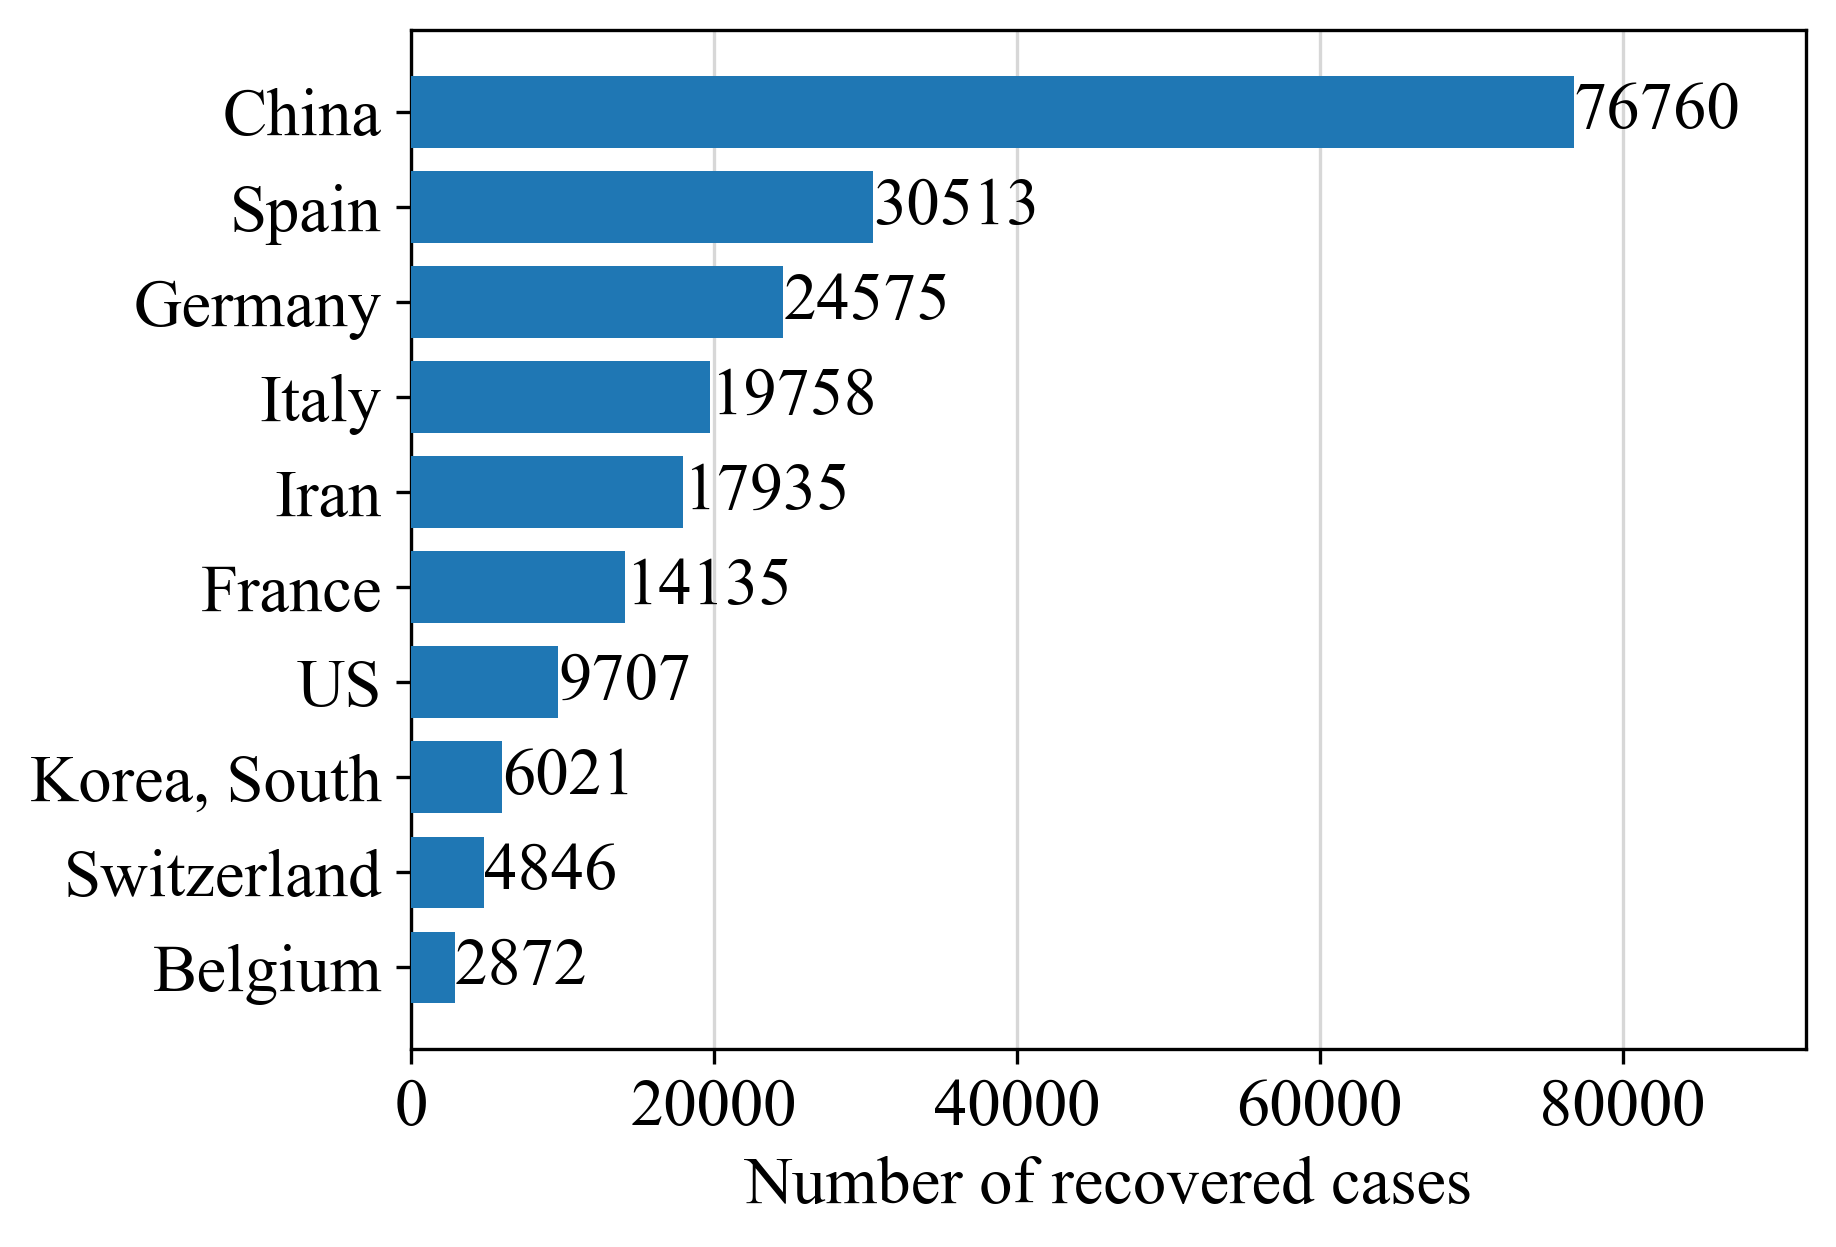

In [104]:
# top 10 countries with recovered cases
fig3 = plt.figure(figsize = (6, 4.5)) # w x h in inches
ax3 = fig3.add_subplot(111)

number = 10

x = df_latest.sort_values(by = 'recovered', axis=0, ascending=False)['recovered'][0:number]
c = df_latest.sort_values(by = 'recovered', axis=0, ascending=False)['country'][0:number]
y = np.arange(0, 10,1)

ax3.barh(y, x, align='center',zorder=3, height=(y[1]-y[0])*0.75)

ax3.set_yticks(np.arange(0, 10,1))
ax3.set_yticklabels(c)
ax3.set_xlim(0, max(x)*1.2)
ax3.invert_yaxis()  
ax3.xaxis.set_major_locator(ticker.MultipleLocator(math.ceil((max(x)-min(x))/5e4)*1e4))
ax3.set_xlabel('Number of recovered cases', fontdict=axis_font)
#ax3.set_title('Number of recovered cases', fontdict=axis_font)

for i, (x, y) in enumerate(zip(x, y)):
    ax3.text(x, i, x,ha='left', va = 'center', fontfamily = font_name, fontsize = font_size)

ax3.grid(axis = 'x',alpha = 0.5, zorder=0) # adding grid in the back with high transparency
axis_formatter(ax = ax3)

fig3.savefig('top_10_recovered.png', dpi = 600, bbox_inches = "tight")

In [97]:
# creating a time series for each country
df_new = pd.DataFrame()
for i in countries:
    df_new[i] = (df_confirmed.groupby('Country/Region').get_group(i).sum()[4:]) # summing the total number of confirmed cases for each country on a day
df_new.insert(loc=0, column='Dates', value=dates)
df_new.set_index('Dates', inplace = True)
df_new.head()

,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahamas,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Benin,Bhutan,Bolivia,Bosnia and Herzegovina,Brazil,Brunei,Bulgaria,Burkina Faso,Cabo Verde,Cambodia,Cameroon,Canada,Central African Republic,Chad,Chile,China,Colombia,Congo (Brazzaville),Congo (Kinshasa),Costa Rica,Cote d'Ivoire,Croatia,Diamond Princess,Cuba,Cyprus,Czechia,Denmark,Djibouti,Dominican Republic,Ecuador,Egypt,El Salvador,Equatorial Guinea,Eritrea,Estonia,Eswatini,Ethiopia,Fiji,Finland,France,Gabon,Gambia,Georgia,Germany,Ghana,Greece,Guatemala,Guinea,Guyana,Haiti,Holy See,Honduras,Hungary,Iceland,India,Indonesia,Iran,Iraq,Ireland,Israel,Italy,Jamaica,Japan,Jordan,Kazakhstan,Kenya,"Korea, South",Kuwait,Kyrgyzstan,Latvia,Lebanon,Liberia,Liechtenstein,Lithuania,Luxembourg,Madagascar,Malaysia,Maldives,Malta,Mauritania,Mauritius,Mexico,Moldova,Monaco,Mongolia,Montenegro,Morocco,Namibia,Nepal,Netherlands,New Zealand,Nicaragua,Niger,Nigeria,North Macedonia,Norway,Oman,Pakistan,Panama,Papua New Guinea,Paraguay,Peru,Philippines,Poland,Portugal,Qatar,Romania,Russia,Rwanda,Saint Lucia,Saint Vincent and the Grenadines,San Marino,Saudi Arabia,Senegal,Serbia,Seychelles,Singapore,Slovakia,Slovenia,Somalia,South Africa,Spain,Sri Lanka,Sudan,Suriname,Sweden,Switzerland,Taiwan*,Tanzania,Thailand,Togo,Trinidad and Tobago,Tunisia,Turkey,Uganda,Ukraine,United Arab Emirates,United Kingdom,Uruguay,US,Uzbekistan,Venezuela,Vietnam,Zambia,Zimbabwe,Dominica,Grenada,Mozambique,Syria,Timor-Leste,Belize,Laos,Libya,West Bank and Gaza,Guinea-Bissau,Mali,Saint Kitts and Nevis,Kosovo,Burma,MS Zaandam,Botswana,Burundi,Sierra Leone,Malawi
Dates,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1/22/20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,548,0,0,0,0,0,0,0,0,0,0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2,0,0,0,0,0,0,0,NaN,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1/23/20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,643,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,3,0,0,0,0,0,0,0,0,0,1,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1/24/20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,920,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,3,0,5,0,0,0,0,0,0,0,0,0,2,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1/25/20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1406,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,2,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,3,0,7,0,0,0,0,0,0,0,0,0,2,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1/26/20,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2075,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,3,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,4,0,8,0,0,0,0,0,0,0,0,0,5,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


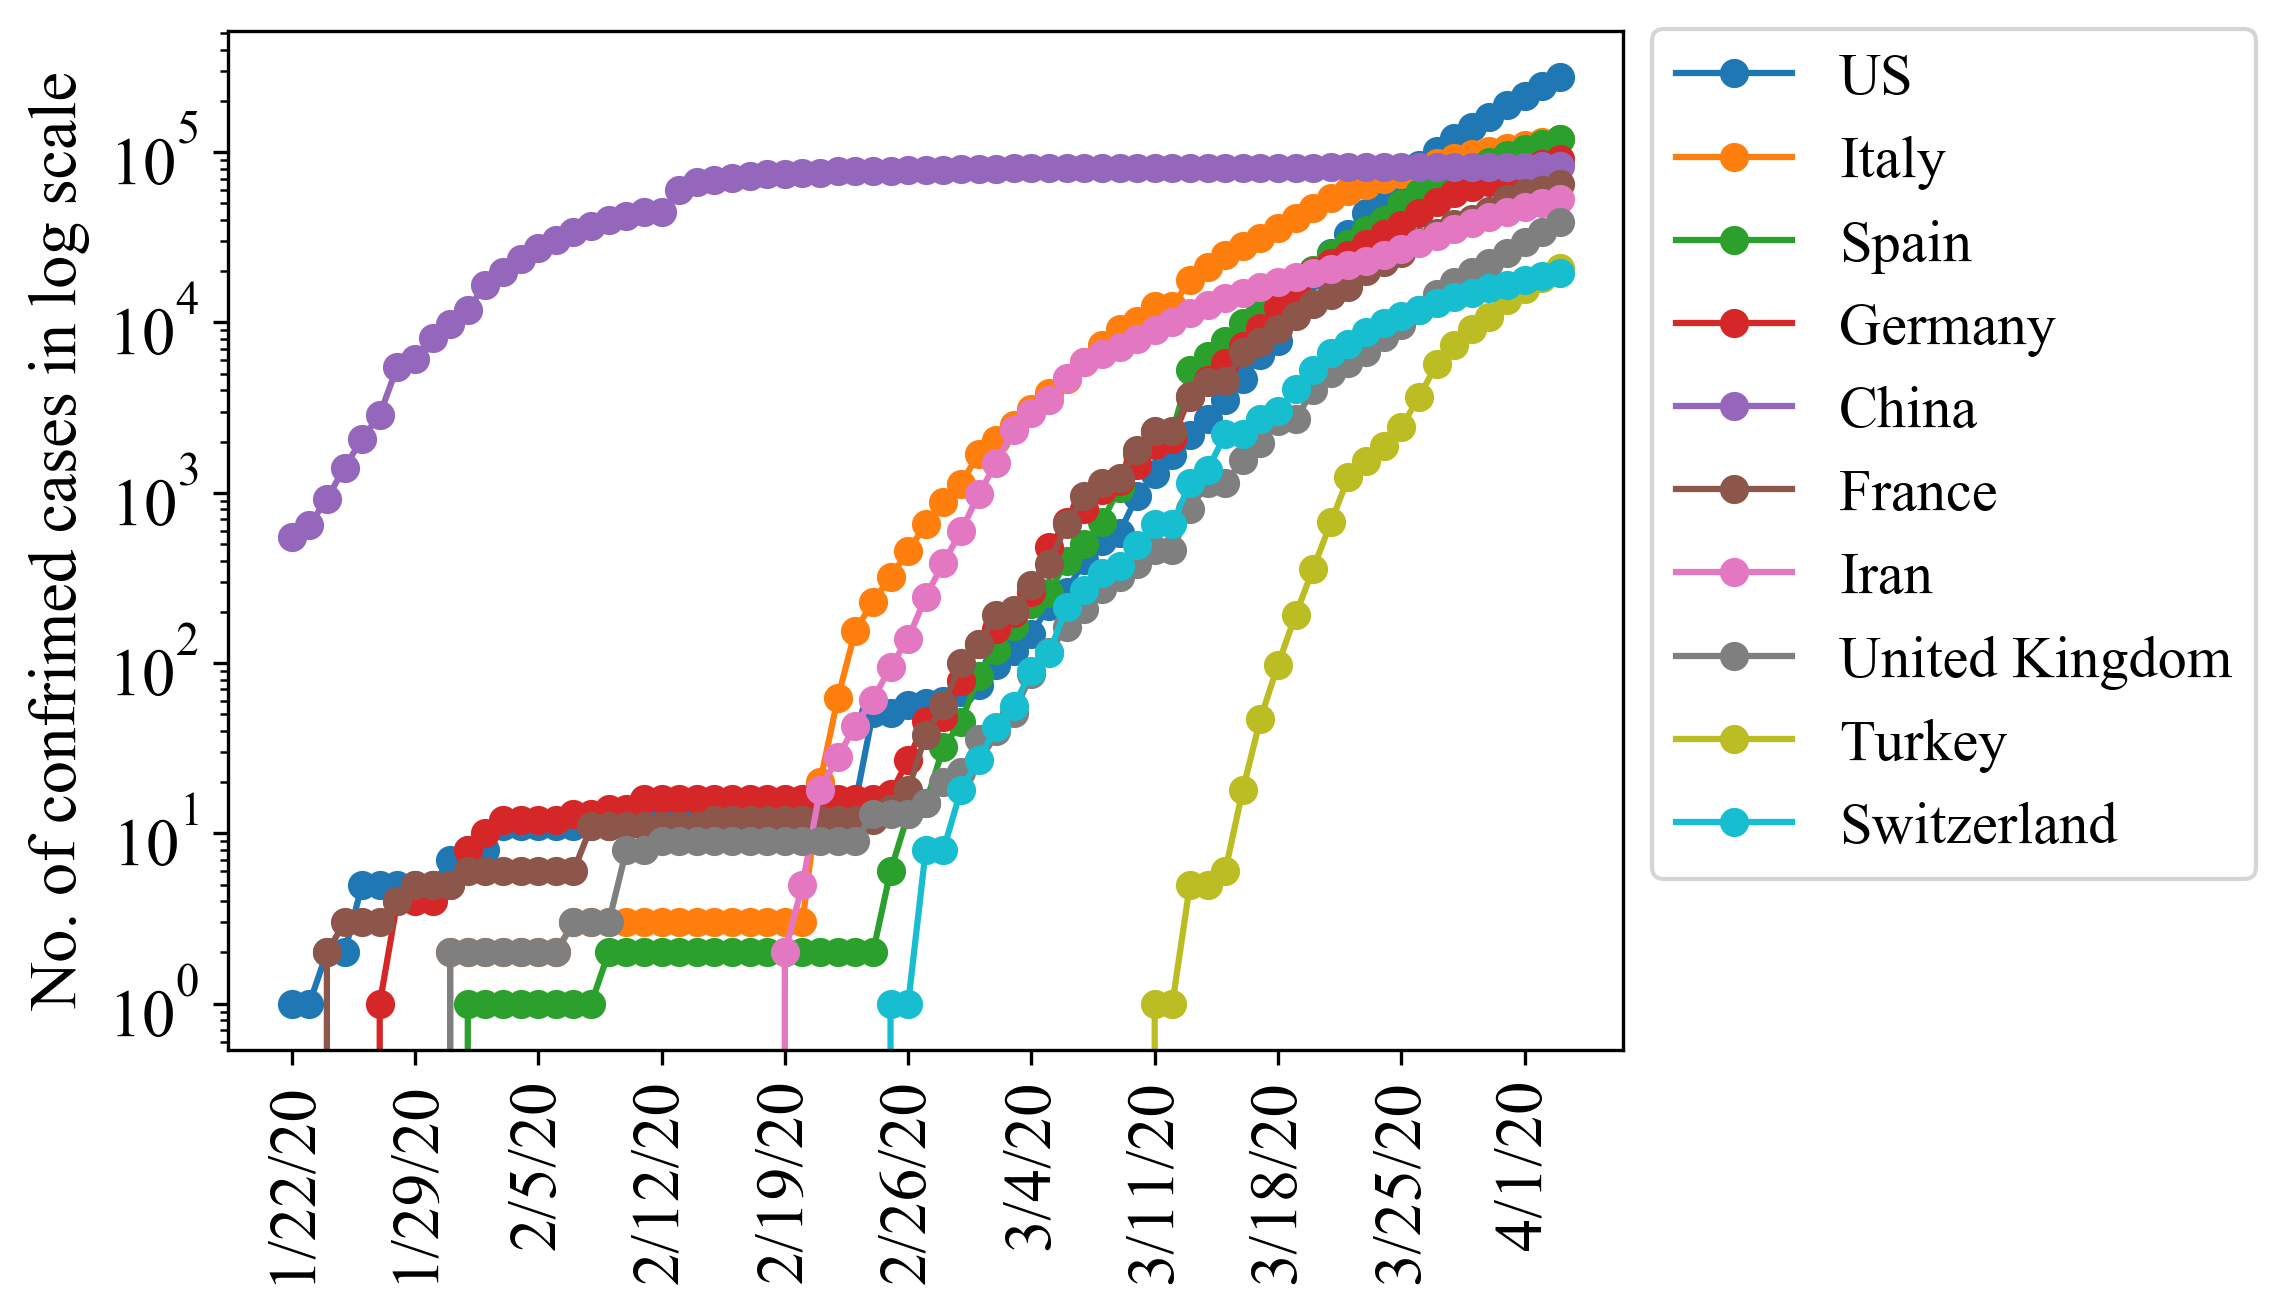

In [105]:
fig4 = plt.figure(figsize = (6, 4.5))
ax4 = fig4.add_subplot(111)

c = df_latest.sort_values(by = 'confirmed', axis=0, ascending=False)['country'][0:10] # top 10 countries with most covid-19 confirmed cases

for i in c:
    ax4.plot(df_new[i], marker = 'o', label = i) # plotting no. of confirmed cases with time

ax4.set_yscale('log') # setting the y scale to log   
ax4.xaxis.set_major_locator(ticker.MultipleLocator(7))
plt.xticks(rotation=90)
axis_formatter(ax = ax4)
ax4.legend(prop={'family':font_name, 'size':14},bbox_to_anchor=(1.0, 1.03))
ax4.set_ylabel('No. of confrimed cases in log scale', fontdict=axis_font)

fig4.savefig('top_10_confirmed_timeseries.png', dpi = 600, bbox_inches = "tight")

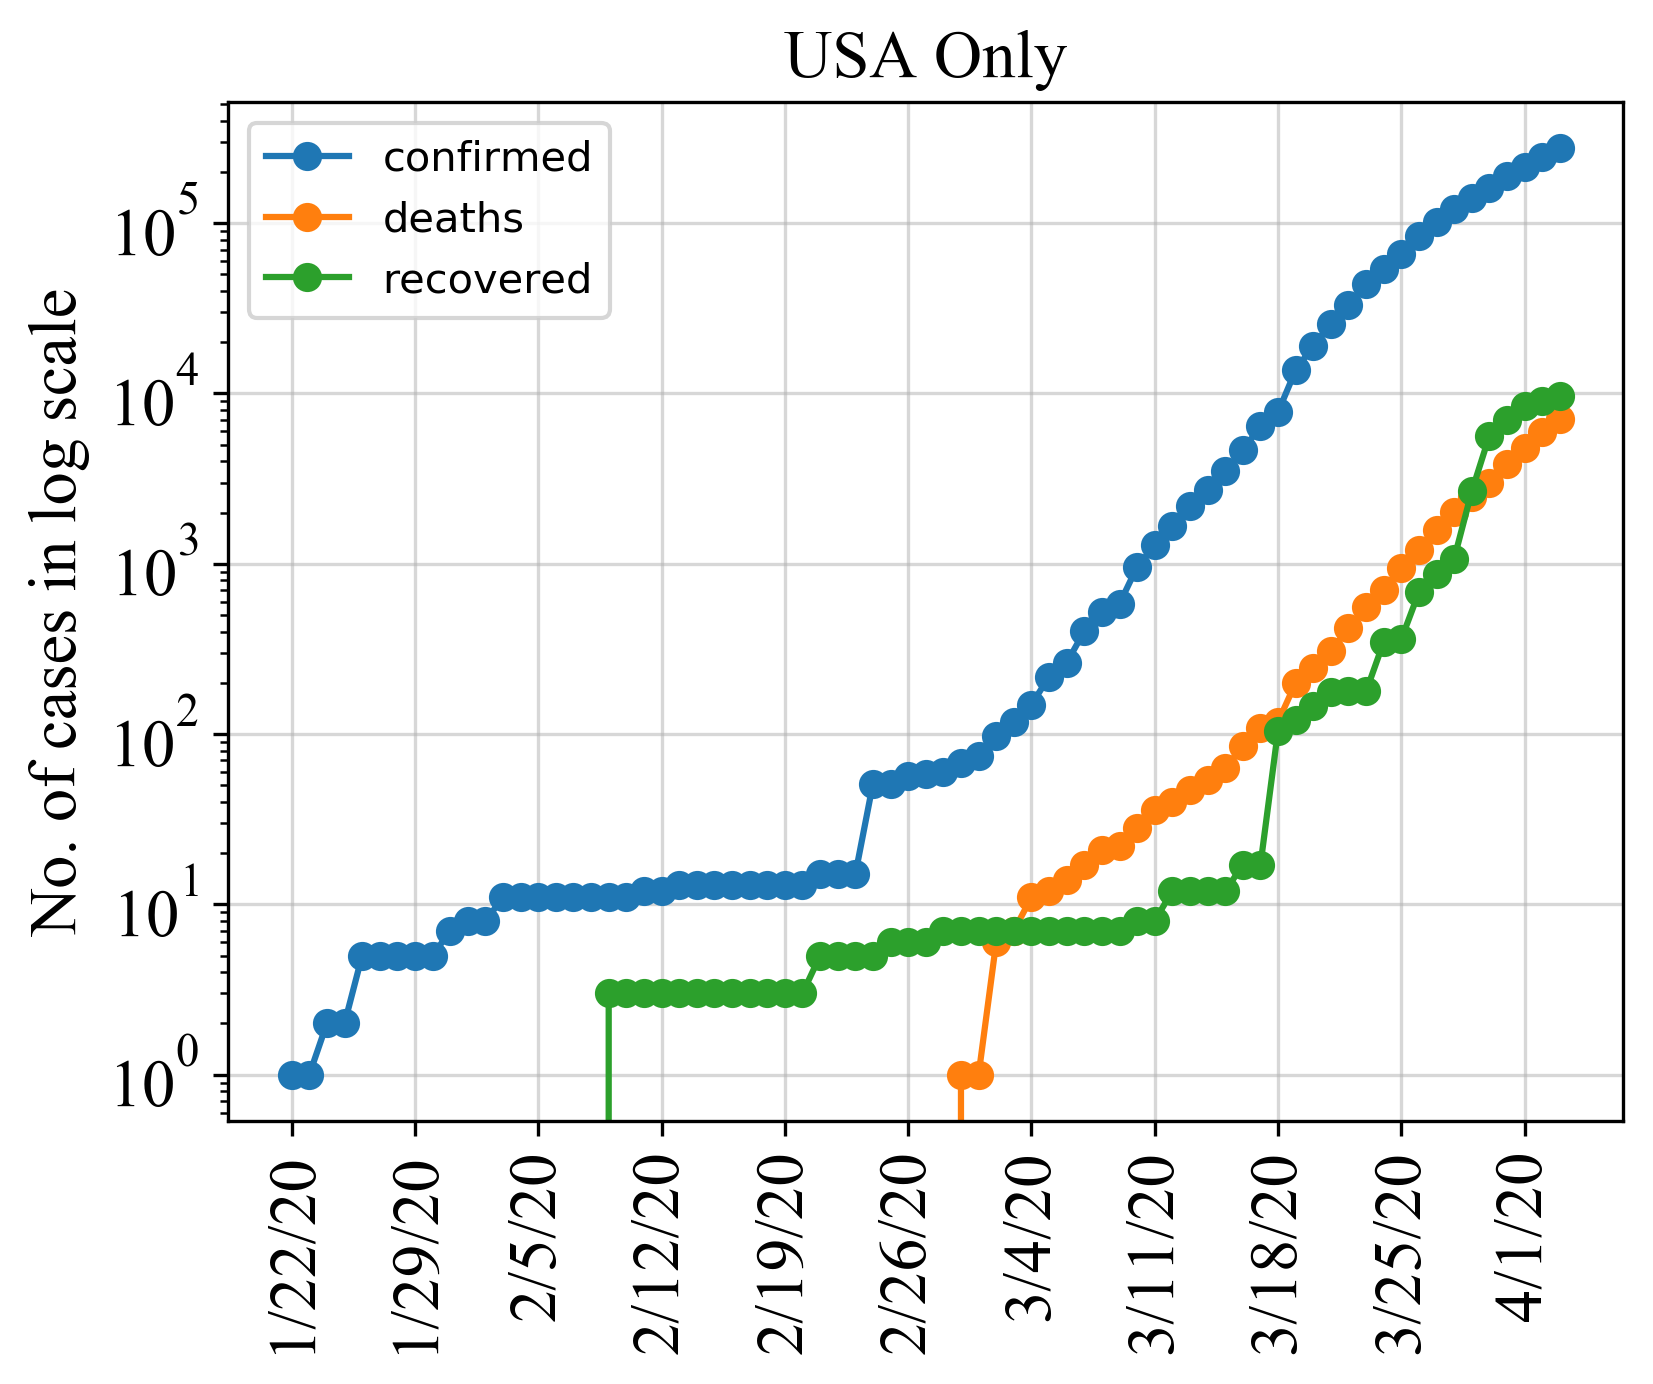

In [106]:
# US analysis
confirmed_US = list(df_confirmed.groupby('Country/Region').get_group('US').sum()[4:])
deaths_US = list(df_deaths.groupby('Country/Region').get_group('US').sum()[4:])
recovered_US = list(df_recovered.groupby('Country/Region').get_group('US').sum()[4:])


fig5 = plt.figure(figsize = (6, 4.5))
ax5 = fig5.add_subplot(111)
#ax5.plot(df_new['US'], marker = 'o', label = 'confirmed')
ax5.plot(dates, confirmed_US, marker = 'o', label = 'confirmed')
ax5.plot(dates, deaths_US, marker = 'o', label = 'deaths')
ax5.plot(dates, recovered_US, marker = 'o', label = 'recovered')

ax5.set_yscale('log')    
ax5.xaxis.set_major_locator(ticker.MultipleLocator(7))
plt.xticks(rotation=90)
plt.legend()
axis_formatter(ax = ax5)
ax5.grid(axis= 'both', alpha = 0.5, zorder=0)
ax5.set_ylabel('No. of cases in log scale', fontdict=axis_font)
ax5.set_title('USA Only', fontdict=axis_font)

fig5.savefig('USA_timeseries.png', dpi = 600, bbox_inches = "tight")

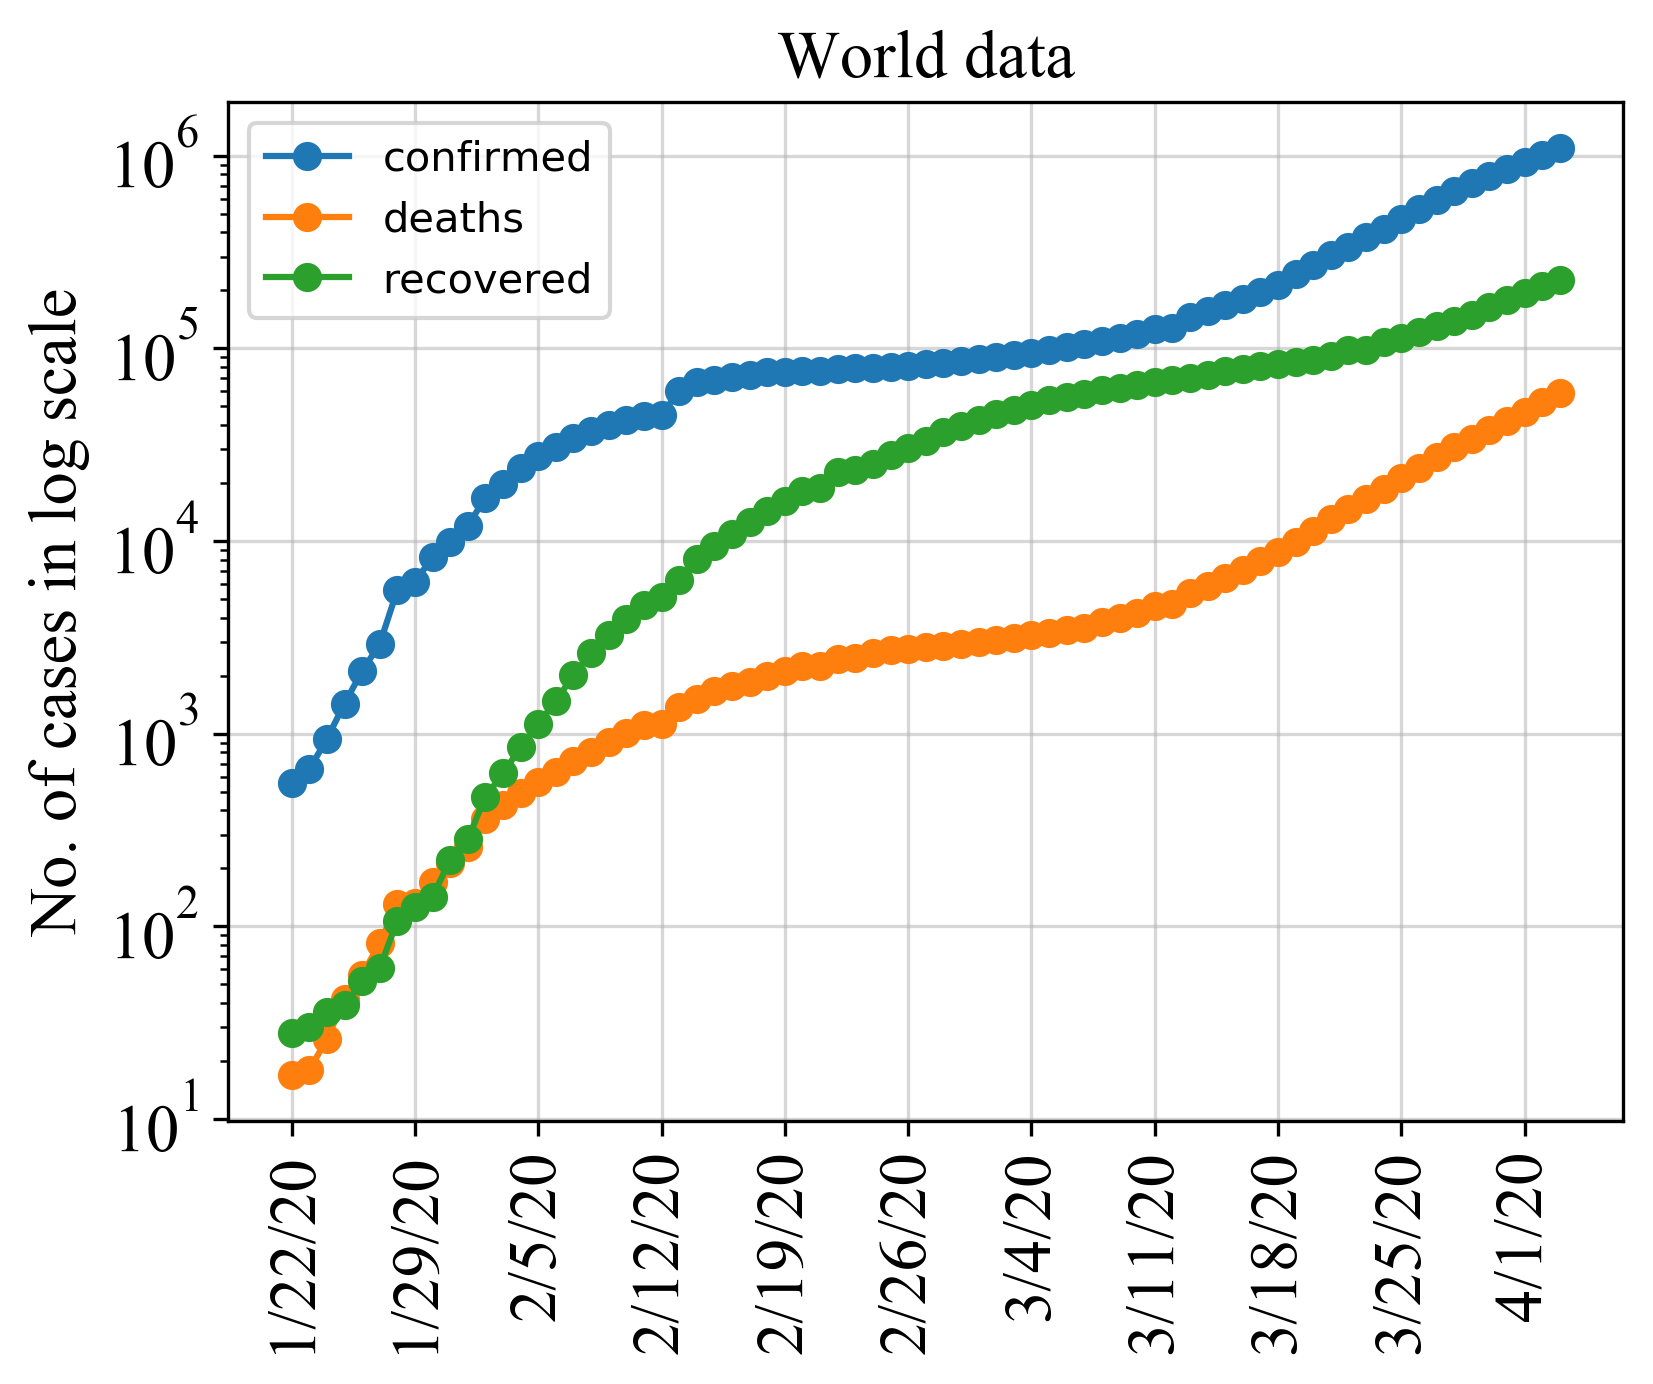

In [107]:
# world analysis
confirmed_world = list(df_confirmed.sum()[3:])
deaths_world = list(df_deaths.sum()[3:])
recovered_world = list(df_recovered.sum()[3:])


fig6 = plt.figure(figsize = (6, 4.5))
ax6 = fig6.add_subplot(111)
#ax6.plot(df_new['US'], marker = 'o', label = 'confirmed')
ax6.plot(dates, confirmed_world, marker = 'o', label = 'confirmed')
ax6.plot(dates, deaths_world, marker = 'o', label = 'deaths')
ax6.plot(dates, recovered_world, marker = 'o', label = 'recovered')

ax6.set_yscale('log')    
ax6.xaxis.set_major_locator(ticker.MultipleLocator(7))
plt.xticks(rotation=90)
plt.legend()
axis_formatter(ax = ax6)
ax6.grid(axis= 'both', alpha = 0.5, zorder=0)
ax6.set_ylabel('No. of cases in log scale', fontdict=axis_font)
ax6.set_title('World data', fontdict=axis_font)

fig6.savefig('world_timeseries.png', dpi = 600, bbox_inches = "tight")

In [101]:
print('World latest: \nconfirmed: {} \t deaths: {} \t recovered: {}'.format(confirmed_world[-1],deaths_world[-1],recovered_world[-1]))
print('USA latest: \nconfirmed: {} \t deaths: {} \t recovered: {}'.format(confirmed_US[-1],deaths_US[-1],recovered_US[-1]))

World latest: 
confirmed: 1095917 	 deaths: 58787 	 recovered: 225796
USA latest: 
confirmed: 275586 	 deaths: 7087 	 recovered: 9707
